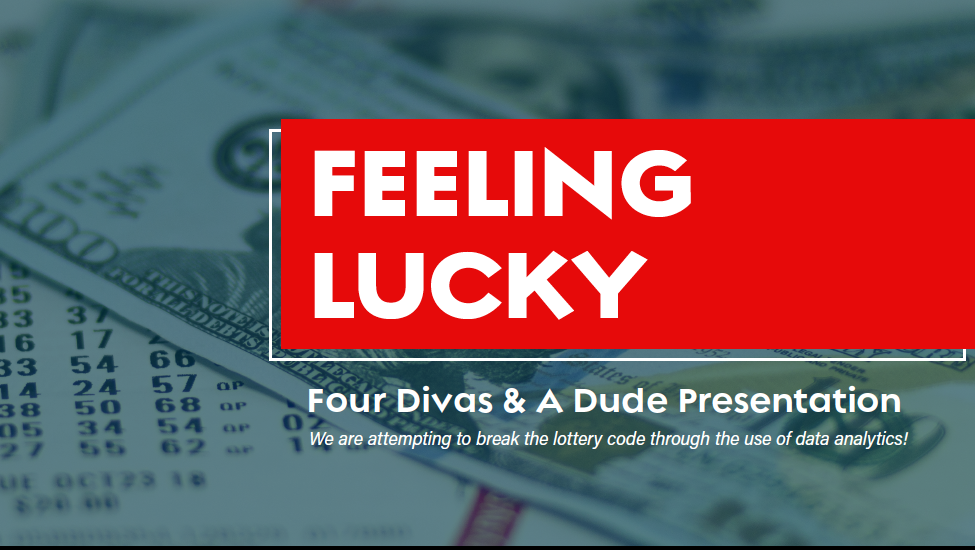

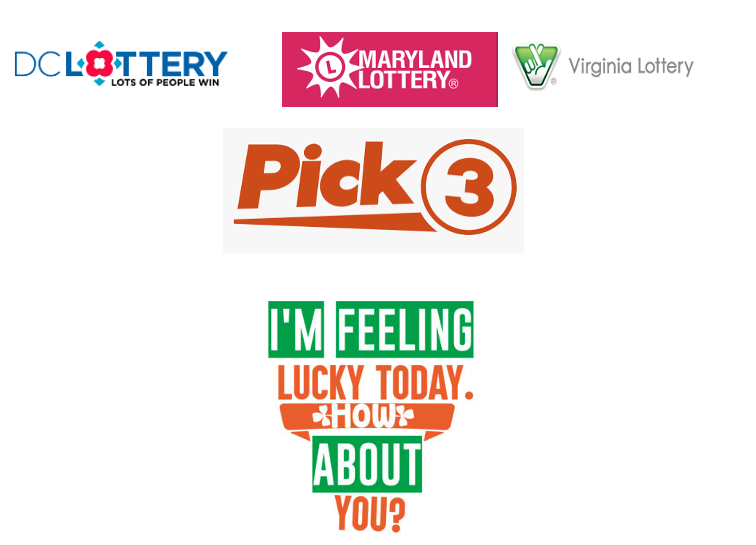

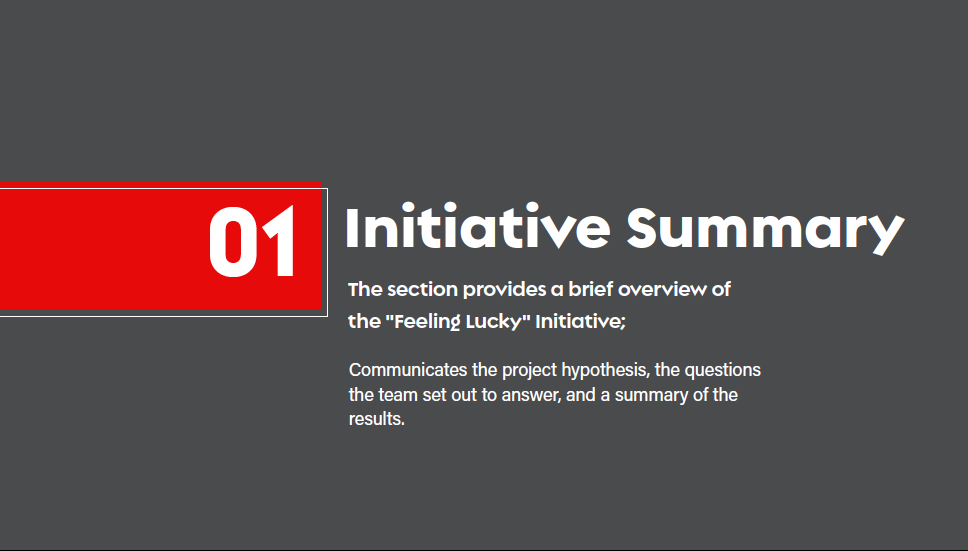

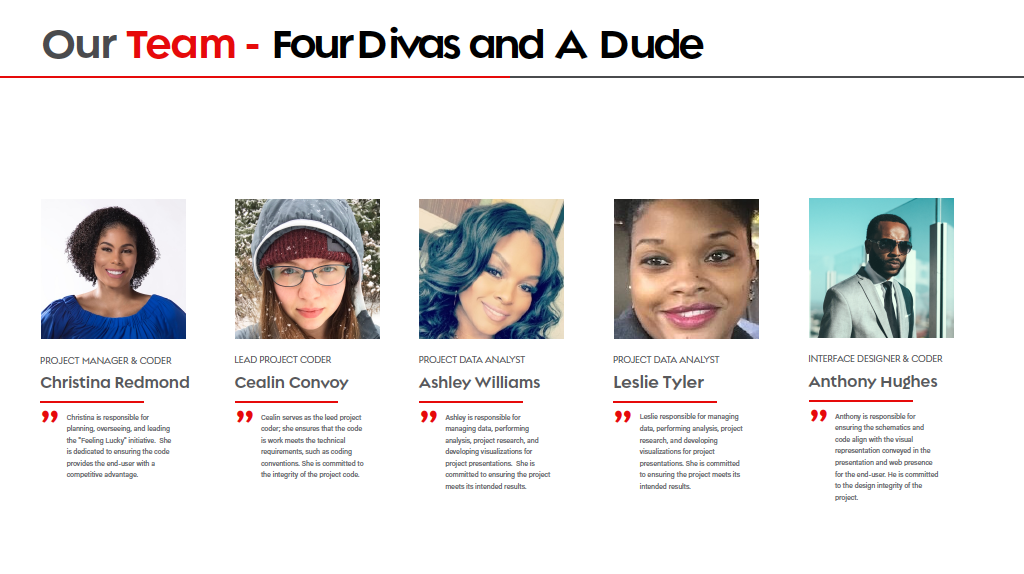

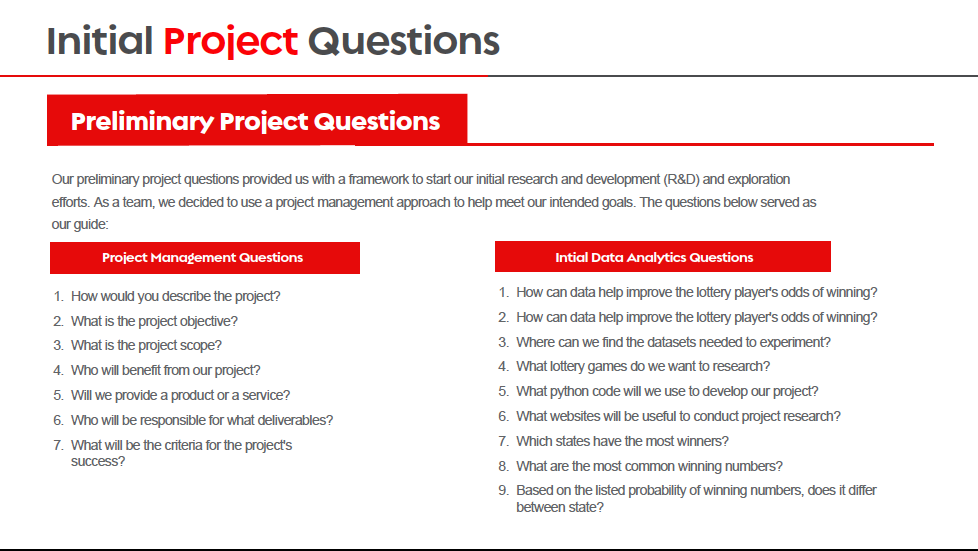

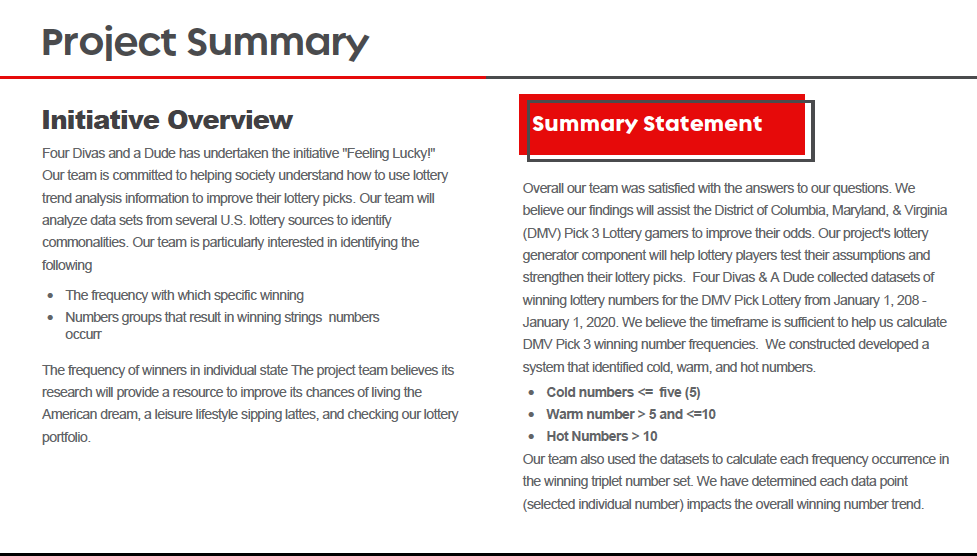

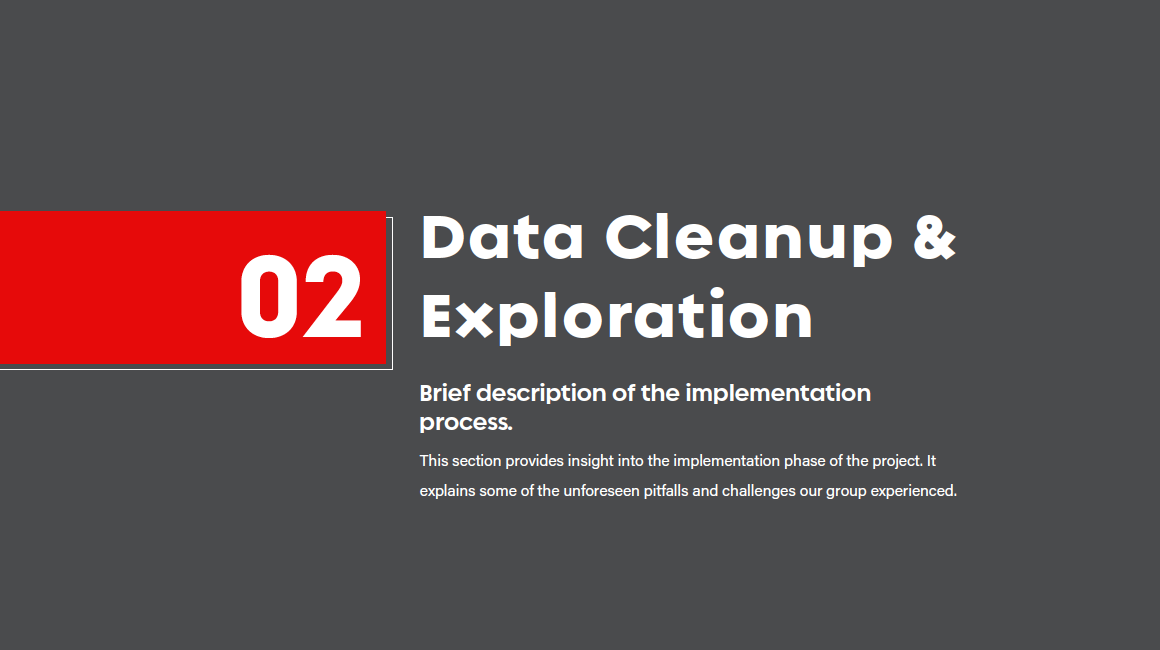

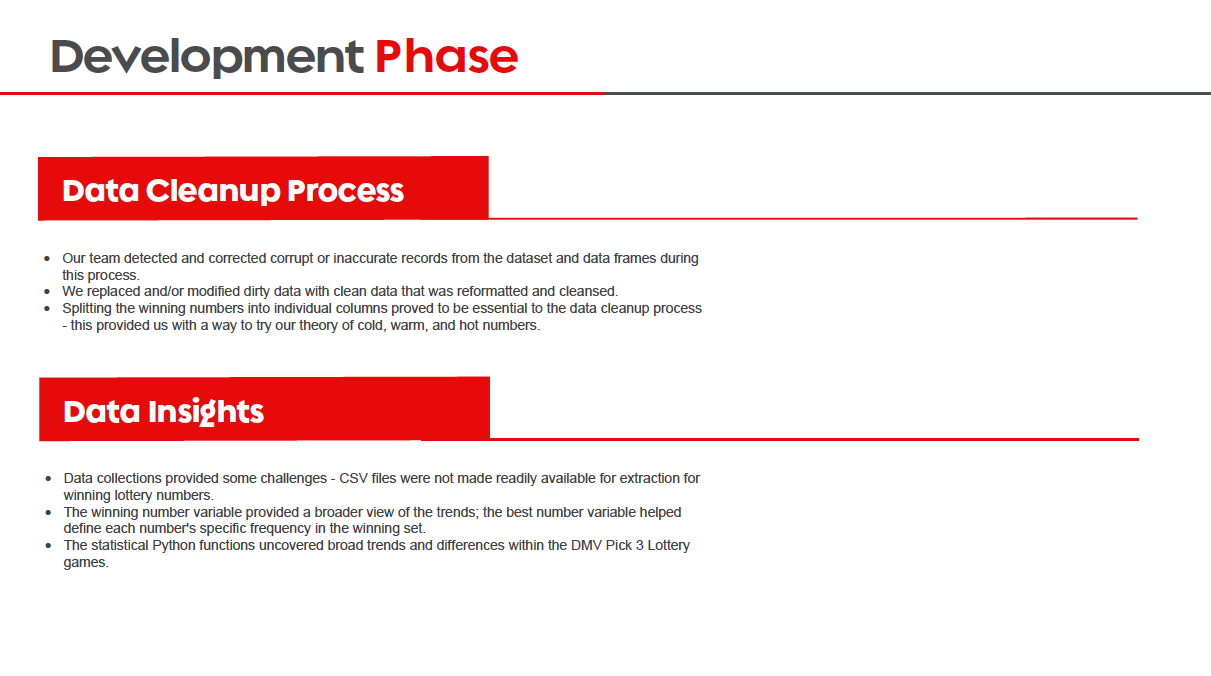

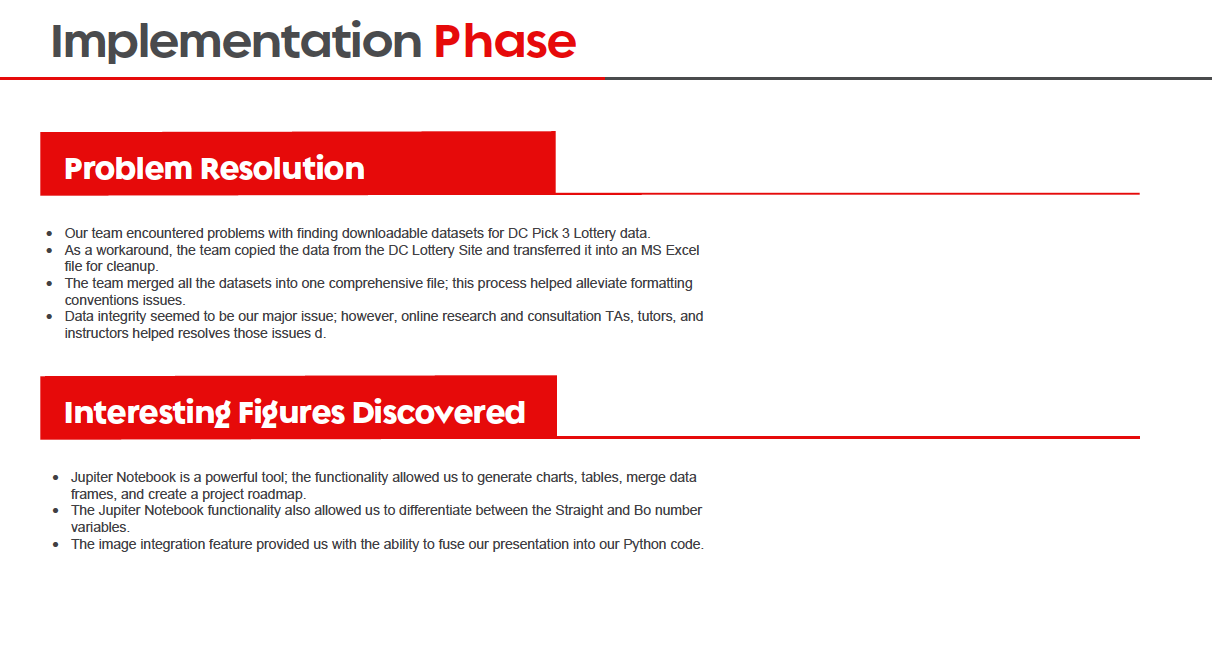

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import requests
import random
import os
import xlrd

### PICK3 GAME!!! ARE YOU FEELING LUCKY

In [2]:
#Read excel files
pick3 = pd.read_excel("Resource/pick3.xlsm") 

# Concatenate Num1, Num2, Num3 becasue the dataframe would drop the "0" digit in Num1

pick3['WinningNumber'] = ''
pick3['WinningNumber'] = pick3['WinningNumber'].map(str) + pick3['Num1'].astype(str) + pick3['Num2'].astype(str) + pick3['Num3'].astype(str)
pick3.head()

,Date,State,TimeofDay,Num1,Num2,Num3,WinningNumber
0,2018-01-01,Maryland,Midday,9,1,5,915
1,2018-01-01,Maryland,Evening,8,2,1,821
2,2018-01-01,Virginia,Midday,9,9,1,991
3,2018-01-01,Virginia,Evening,4,2,6,426
4,2018-01-01,"Washington,DC",Midday,5,9,3,593


                      📊 📈 💹   PICK 3 CHARTS for HOT, WARM, COLD Numbers 📊 📈 💹 

In [3]:
# What are the most frequent number in Pick 3 (Hot, Cold)
pick3['WinningNumber'].head()

0    915
1    821
2    991
3    426
4    593
Name: WinningNumber, dtype: object

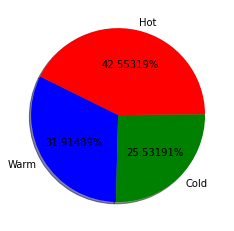

In [4]:
import matplotlib.pyplot as plt
test_x = ["Hot", "Warm", "Cold"]

# Labels for the sections of our pie chart
labels = ["Hot", "Warm", "Cold", ]

# The values of each section of the pie chart
sizes = [100, 75, 60]

# The colors of each section of the pie chart
colors = ["red", "blue", "green"]

explode = (0,0,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%.5f%%", shadow=True, startangle=.5)

plt.savefig("Images/Pick3Pie")

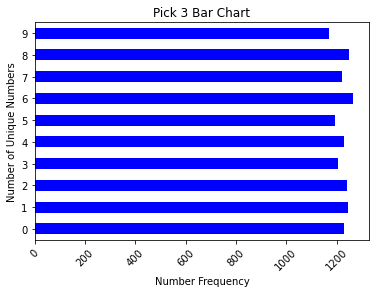

In [5]:
state = pick3['State']
totals = pick3['Num1'].value_counts() + pick3['Num2'].value_counts() + pick3['Num3'].value_counts()
y_axis = pick3.values
x_axis = pick3.values
plt.xlabel('Number Frequency')
plt.ylabel('Number of Unique Numbers') 
plt.title("Pick 3 Bar Chart")
totals.plot(kind="barh", color="blue")
plt.xticks(rotation="45")

plt.savefig("Images/Pick3BarH")

                                 🎰 Frequency Generator for Pick 3  🎰

In [6]:
# Frequency Generator for Pick 3
num1_freq = pick3['Num1'].value_counts().index.to_list()
num2_freq = pick3['Num2'].value_counts().index.to_list()
num3_freq = pick3['Num3'].value_counts().index.to_list()

print (num1_freq, 
       num2_freq, 
       num3_freq)

[6, 7, 3, 4, 2, 8, 5, 9, 0, 1] [1, 4, 0, 2, 6, 8, 9, 3, 5, 7] [8, 1, 2, 6, 7, 0, 5, 3, 4, 9]


In [7]:
# Pick3 Numbers and Frequency 
#Frequency Loop
win = []
for col in ["Num1", "Num2", "Num3"]:
    win_series = pick3[col].value_counts()
    win_series.name = col
    win.append(win_series)
    #print(win_series)
    #print()

In [8]:
# Best 3 Frequency Number for Column Num1, Num2, Num3
best1 = num1_freq[0:3]
best2 = num2_freq[0:3]
best3 = num3_freq[0:3]

In [9]:
#Generate random number based of best1,2,3
gen1 = random.choice(best1)
gen2 = random.choice(best2)
gen3 = random.choice(best3)

gen_pick3 = f'{gen1}{gen2}{gen3}'

gen_pick3

'602'

In [10]:
#Input any number see how many times it wins straight 
straight = pick3.loc[pick3['WinningNumber'] == gen_pick3]
straight


,Date,State,TimeofDay,Num1,Num2,Num3,WinningNumber
1271,2018-08-24,"Washington,DC",Evening,6,0,2,602
2301,2019-03-02,Maryland,Evening,6,0,2,602
2571,2019-04-20,Virginia,Evening,6,0,2,602
2782,2019-05-28,Virginia,Evening,6,0,2,602
3354,2019-09-10,Virginia,Midday,6,0,2,602
3844,2019-12-08,Maryland,Evening,6,0,2,602
4036,2020-01-18,Maryland,Midday,6,0,2,602


In [11]:
# Loop for Sorted Number

pick3['SortedNumber'] = None

for index, row in pick3.iterrows():
    #print(row['WinningNumber'])
    row = [char for char in row['WinningNumber']]
    #print(row)
    box = ''.join(sorted(row))
    pick3.loc[index,'SortedNumber'] = box

In [12]:
#Generator for Sorted Number
gen_box_pick3 = ''.join(sorted([g for g in gen_pick3]))
gen_box_pick3

'026'

In [13]:
box = pick3.loc[pick3['SortedNumber'] == gen_box_pick3]
box.head()

,Date,State,TimeofDay,Num1,Num2,Num3,WinningNumber,SortedNumber
215,2018-02-09,Maryland,Midday,0,2,6,026,026
386,2018-03-12,Maryland,Evening,2,6,0,260,026
798,2018-05-27,Virginia,Evening,0,2,6,026,026
825,2018-06-01,"Washington,DC",Midday,0,6,2,062,026
1099,2018-07-23,Maryland,Evening,2,6,0,260,026


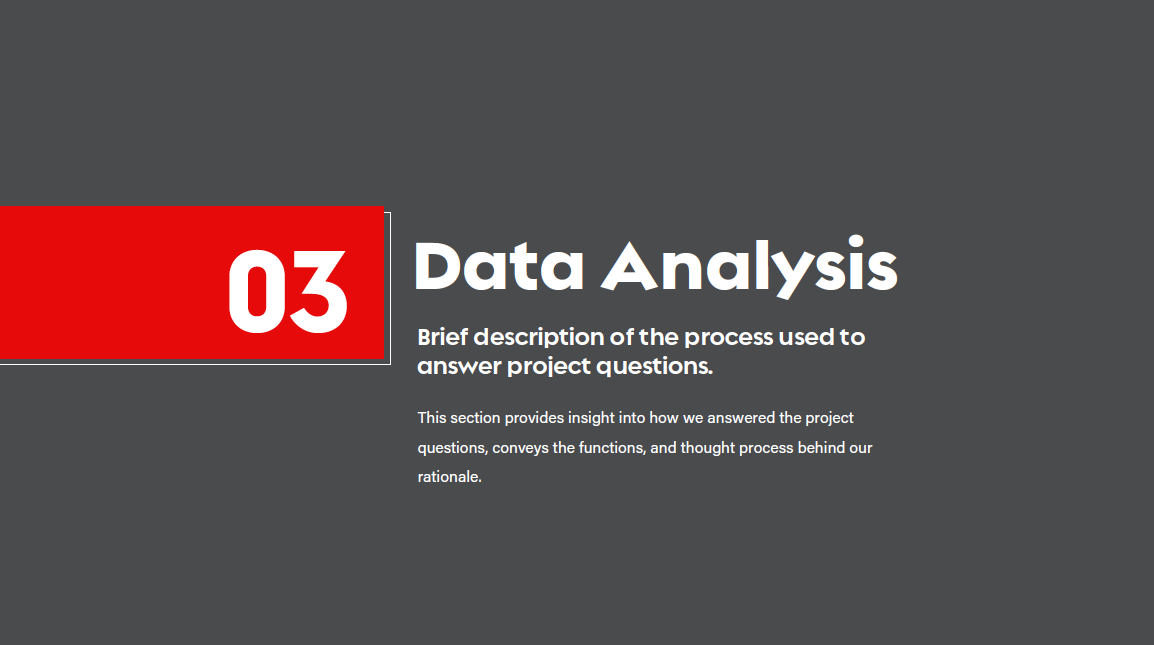

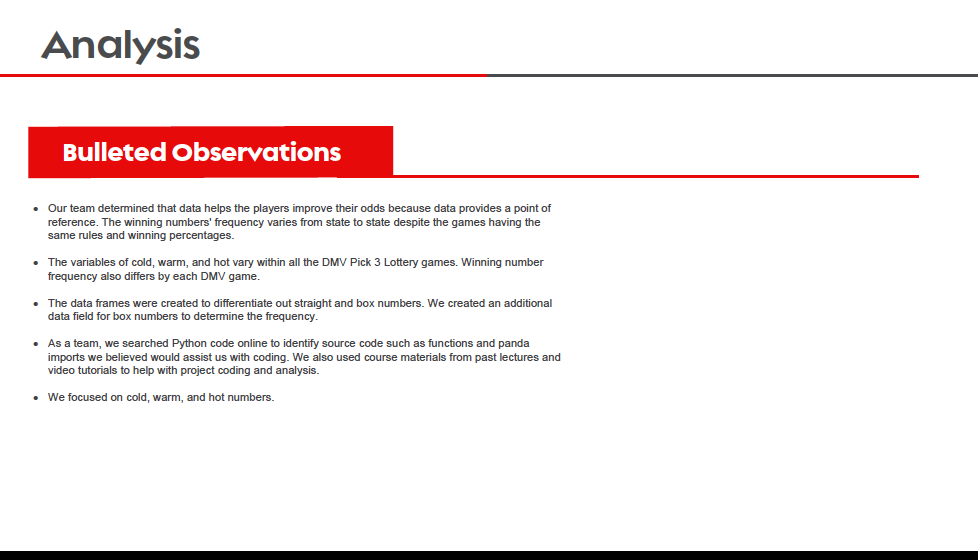

                          🤑 🤑 🤑   PICK A NUMBER GAME 🤑 🤑 🤑
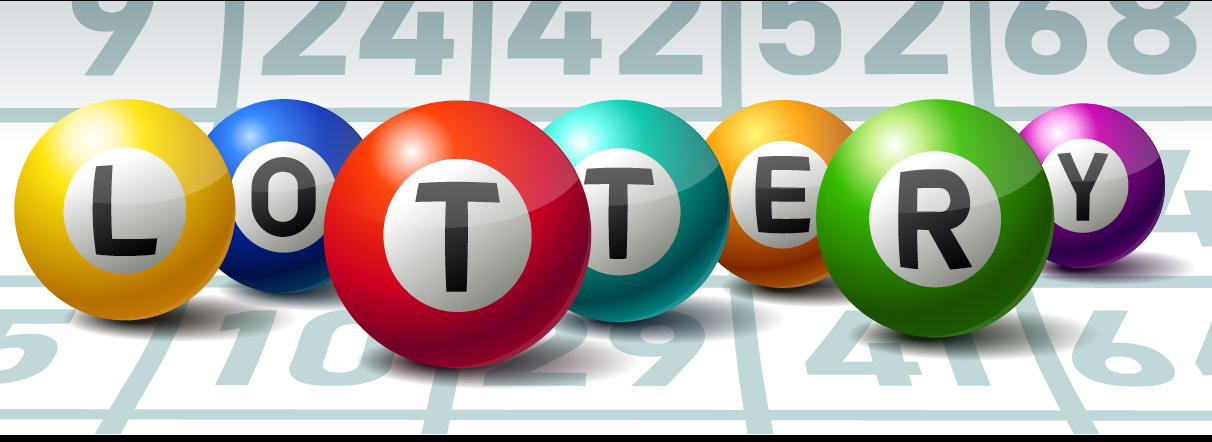

In [14]:
# Feeling lucky? Pick a number (Pick3)

user_num = input('Feeling lucky? Pick a number: ')

user_num

straight_user_pick3 = user_num
box_user_pick3 = ''.join(sorted(user_num))

Feeling lucky? Pick a number: 484


In [15]:
straight = pick3.loc[pick3['WinningNumber'] == straight_user_pick3]
print(f'{straight_user_pick3} came out {len(straight)} times (Straight) from January 2018 to January 2020')
straight

484 came out 5 times (Straight) from January 2018 to January 2020


,Date,State,TimeofDay,Num1,Num2,Num3,WinningNumber,SortedNumber
844,2018-06-05,Maryland,Evening,4,8,4,484,448
969,2018-06-29,Maryland,Midday,4,8,4,484,448
1023,2018-07-09,Maryland,Midday,4,8,4,484,448
3296,2019-08-30,"Washington,DC",Evening,4,8,4,484,448
3368,2019-09-12,"Washington,DC",Midday,4,8,4,484,448


In [16]:
box = pick3.loc[pick3['SortedNumber'] == box_user_pick3]

print(f'{box_user_pick3} came out {len(box)} times (Box) from January 2018 to January 2020')

box

448 came out 19 times (Box) from January 2018 to January 2020


,Date,State,TimeofDay,Num1,Num2,Num3,WinningNumber,SortedNumber
585,2018-04-17,Virginia,Evening,4,4,8,448,448
666,2018-05-03,Maryland,Evening,4,4,8,448,448
844,2018-06-05,Maryland,Evening,4,8,4,484,448
969,2018-06-29,Maryland,Midday,4,8,4,484,448
1023,2018-07-09,Maryland,Midday,4,8,4,484,448
1347,2018-09-08,Virginia,Evening,4,4,8,448,448
1374,2018-09-13,"Washington,DC",Evening,8,4,4,844,448
1465,2018-10-01,Virginia,Evening,8,4,4,844,448
1469,2018-10-02,Virginia,Midday,8,4,4,844,448
2393,2019-03-19,Virginia,Evening,4,4,8,448,448


In [17]:
# generated number stuff
gen_pick3
gen_box_pick3


gen_dc_straight = pick3.loc[(pick3['State'] == 'Washington,DC') & (pick3['WinningNumber'] == gen_pick3)]
gen_md_straight = pick3.loc[(pick3['State'] == 'Maryland') & (pick3['WinningNumber'] == gen_pick3)]
gen_va_straight = pick3.loc[(pick3['State'] == 'Virginia') & (pick3['WinningNumber'] == gen_pick3)]


gen_dc_box = pick3.loc[(pick3['State'] == 'Washington,DC') & (pick3['SortedNumber'] == gen_box_pick3)]
gen_md_box = pick3.loc[(pick3['State'] == 'Maryland') & (pick3['SortedNumber'] == gen_box_pick3)]
gen_va_box = pick3.loc[(pick3['State'] == 'Virginia') & (pick3['SortedNumber'] == gen_box_pick3)]


In [18]:
dc_straight = pick3.loc[(pick3['State'] == 'Washington,DC') & (pick3['WinningNumber'] == straight_user_pick3)]
print(f'{straight_user_pick3} came out {len(dc_straight)} in Washington,DC from January 2018 to January 2020')

dc_straight

484 came out 2 in Washington,DC from January 2018 to January 2020


,Date,State,TimeofDay,Num1,Num2,Num3,WinningNumber,SortedNumber
3296,2019-08-30,"Washington,DC",Evening,4,8,4,484,448
3368,2019-09-12,"Washington,DC",Midday,4,8,4,484,448


In [19]:
md_straight = pick3.loc[(pick3['State'] == 'Maryland') & (pick3['WinningNumber'] == straight_user_pick3)]
print(f'{straight_user_pick3} came out {len(md_straight)} in Maryland  from January 2018 to January 2020')

md_straight

484 came out 3 in Maryland  from January 2018 to January 2020


,Date,State,TimeofDay,Num1,Num2,Num3,WinningNumber,SortedNumber
844,2018-06-05,Maryland,Evening,4,8,4,484,448
969,2018-06-29,Maryland,Midday,4,8,4,484,448
1023,2018-07-09,Maryland,Midday,4,8,4,484,448


In [20]:
va_straight = pick3.loc[(pick3['State'] == 'Virginia') & (pick3['WinningNumber'] == straight_user_pick3)]
print(f'{straight_user_pick3} came out {len(va_straight)} in Virginia from January 2018 to January 2020')

va_straight

484 came out 0 in Virginia from January 2018 to January 2020


,Date,State,TimeofDay,Num1,Num2,Num3,WinningNumber,SortedNumber


In [21]:
dc_box = pick3.loc[(pick3['State'] == 'Washington,DC') & (pick3['SortedNumber'] == box_user_pick3)]
print(f'{box_user_pick3} came out {len(dc_box)} in Washington,DC from January 2018 to January 2020')

dc_box

448 came out 5 in Washington,DC from January 2018 to January 2020


,Date,State,TimeofDay,Num1,Num2,Num3,WinningNumber,SortedNumber
1374,2018-09-13,"Washington,DC",Evening,8,4,4,844,448
2567,2019-04-19,"Washington,DC",Evening,8,4,4,844,448
3296,2019-08-30,"Washington,DC",Evening,4,8,4,484,448
3368,2019-09-12,"Washington,DC",Midday,4,8,4,484,448
3501,2019-10-06,"Washington,DC",Midday,4,4,8,448,448


In [22]:
va_box = pick3.loc[(pick3['State'] == 'Virginia') & (pick3['SortedNumber'] == box_user_pick3)]

print(f'{box_user_pick3} came out {len(va_box)} in the state of Virginia from January 2018 to January 2020')

va_box


448 came out 9 in the state of Virginia from January 2018 to January 2020


,Date,State,TimeofDay,Num1,Num2,Num3,WinningNumber,SortedNumber
585,2018-04-17,Virginia,Evening,4,4,8,448,448
1347,2018-09-08,Virginia,Evening,4,4,8,448,448
1465,2018-10-01,Virginia,Evening,8,4,4,844,448
1469,2018-10-02,Virginia,Midday,8,4,4,844,448
2393,2019-03-19,Virginia,Evening,4,4,8,448,448
2570,2019-04-20,Virginia,Midday,8,4,4,844,448
2665,2019-05-07,Virginia,Midday,4,4,8,448,448
3326,2019-09-05,Virginia,Midday,8,4,4,844,448
3857,2019-12-10,Virginia,Evening,4,4,8,448,448


In [23]:
md_box = pick3.loc[(pick3['State'] == 'Maryland') & (pick3['SortedNumber'] == box_user_pick3)]

print(f'{box_user_pick3} came out {len(md_box)} in the state of Maryland from January 2018 to January 2020')

md_box

448 came out 5 in the state of Maryland from January 2018 to January 2020


,Date,State,TimeofDay,Num1,Num2,Num3,WinningNumber,SortedNumber
666,2018-05-03,Maryland,Evening,4,4,8,448,448
844,2018-06-05,Maryland,Evening,4,8,4,484,448
969,2018-06-29,Maryland,Midday,4,8,4,484,448
1023,2018-07-09,Maryland,Midday,4,8,4,484,448
2607,2019-04-27,Maryland,Midday,4,4,8,448,448


In [24]:

count_dc_straight = len(dc_straight)
count_md_straight = len(md_straight)
count_va_straight = len(va_straight)

count_dc_box = len(dc_box)
count_md_box = len(md_box)
count_va_box = len(va_box)

results_data = [
    {'State':'DC', 'User Pick':user_num, 'Straight':count_dc_straight, 'Box': count_dc_box},
    {'State':'MD', 'User Pick':user_num, 'Straight':count_md_straight, 'Box': count_md_box},
    {'State':'VA', 'User Pick':user_num, 'Straight':count_va_straight, 'Box': count_va_box}
]

results_df = pd.DataFrame(results_data)
results_df.set_index('State', inplace=True)
results_df


,User Pick,Straight,Box
State,,,
DC,484,2,5
MD,484,3,5
VA,484,0,9


In [25]:

count_gen_dc_straight = len(gen_dc_straight)
count_gen_md_straight = len(gen_md_straight)
count_gen_va_straight = len(gen_va_straight)

count_gen_dc_box = len(gen_dc_box)
count_gen_md_box = len(gen_md_box)
count_gen_va_box = len(gen_va_box)

gen_results_data = [
    {'State':'DC', 'User Pick':gen_pick3, 'Straight':count_gen_dc_straight, 'Box': count_gen_dc_box},
    {'State':'MD', 'User Pick':gen_pick3, 'Straight':count_gen_md_straight, 'Box': count_gen_md_box},
    {'State':'VA', 'User Pick':gen_pick3, 'Straight':count_gen_va_straight, 'Box': count_gen_va_box}
]

gen_results_df = pd.DataFrame(gen_results_data)
gen_results_df.set_index('State', inplace=True)
gen_results_df


,User Pick,Straight,Box
State,,,
DC,602,1,5
MD,602,3,14
VA,602,3,9


Text(0.5, 1.0, 'Our Generated Lucky Pick: 602')

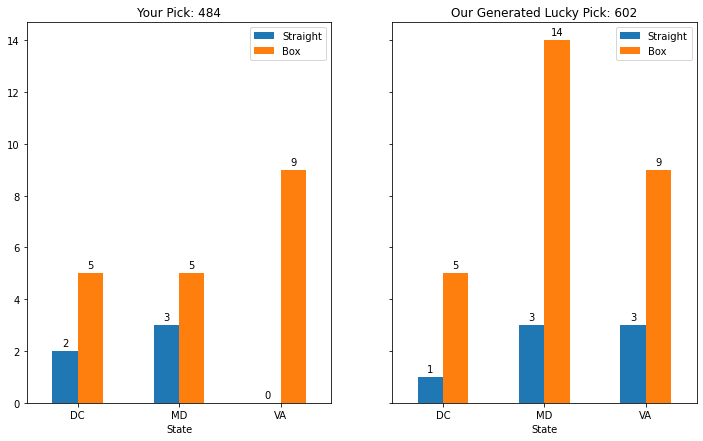

In [26]:
def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True)
#fig.title('Horizontally stacked subplots')
results_plot = results_df[['Straight','Box']].plot(kind='bar', ax=ax1)
gen_results_plot = gen_results_df[['Straight','Box']].plot(kind='bar', ax=ax2)

rects = results_plot.patches
gen_rects = gen_results_plot.patches

autolabel(rects, ax1)
autolabel(gen_rects, ax2)

for tick in ax1.get_xticklabels():
    tick.set_rotation(0)
    
for tick in ax2.get_xticklabels():
    tick.set_rotation(0)
    
fig.set_size_inches(12,7)

ax1.set_title(f'Your Pick: {user_num}')
ax2.set_title(f'Our Generated Lucky Pick: {gen_pick3}')